In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
df=pd.read_csv("../dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stringFeature= ['gender','ever_married','work_type','Residence_type','smoking_status']

floatFeature=['age','avg_glucose_level', 'bmi']

In [4]:
data = df.replace(to_replace="?", value=np.NaN)
data = data.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder

for i in stringFeature:
    temp = LabelEncoder()
    data[i] = temp.fit_transform(data[i])
    

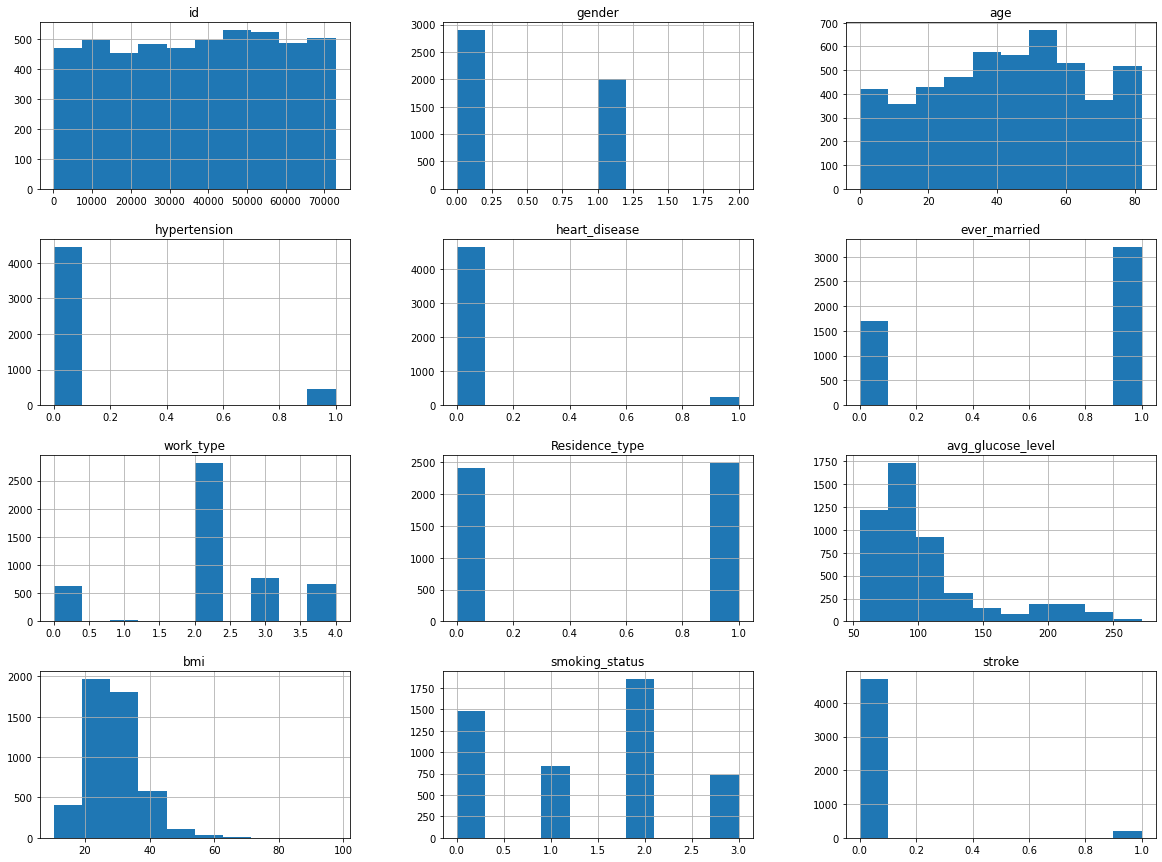

In [6]:
data.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

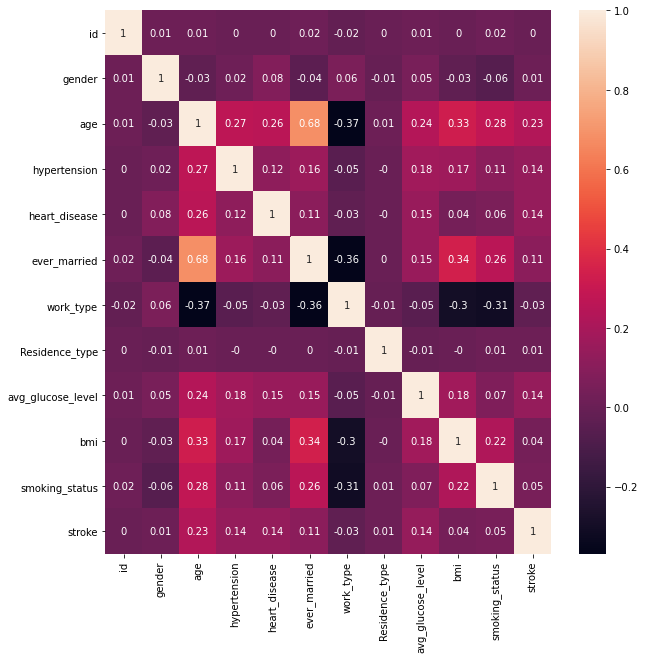

In [7]:
correlation_maxtrix=data.corr().round(2)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_maxtrix,annot=True)

In [8]:

classification_feature= ['gender','hypertension','heart_disease','ever_married','work_type',"Residence_type","smoking_status"]

float_Feature=['age','avg_glucose_level', 'bmi']

In [9]:
classification_data = data.drop(float_Feature,axis=1)
classification_data.head(5)


,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,9046,1,0,1,1,2,1,1,1
2,31112,1,0,1,1,2,0,2,1
3,60182,0,0,0,1,2,1,3,1
4,1665,0,1,0,1,3,0,2,1
5,56669,1,0,0,1,2,1,1,1


In [10]:
float_data=data.drop(classification_feature,axis=1)
float_data.head(5)


,id,age,avg_glucose_level,bmi,stroke
0,9046,67.0,228.69,36.6,1
2,31112,80.0,105.92,32.5,1
3,60182,49.0,171.23,34.4,1
4,1665,79.0,174.12,24.0,1
5,56669,81.0,186.21,29.0,1


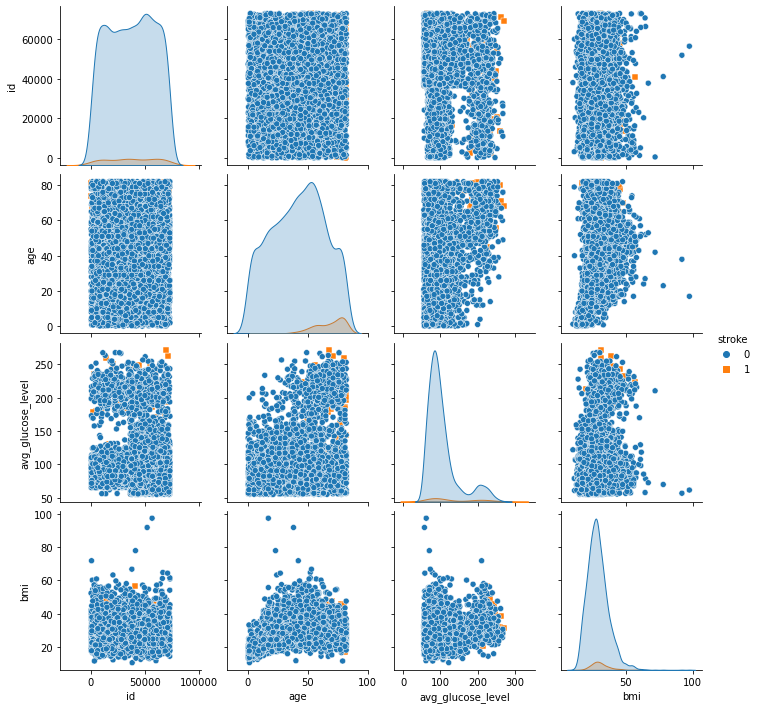

In [11]:
sns.pairplot(float_data ,hue ="stroke", markers=["o", "s"])


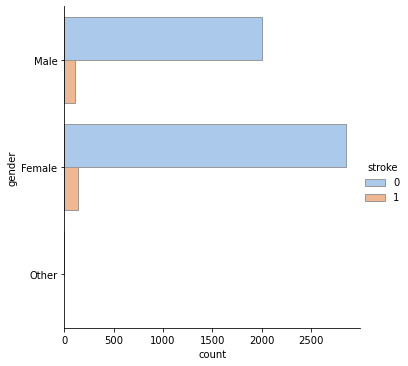

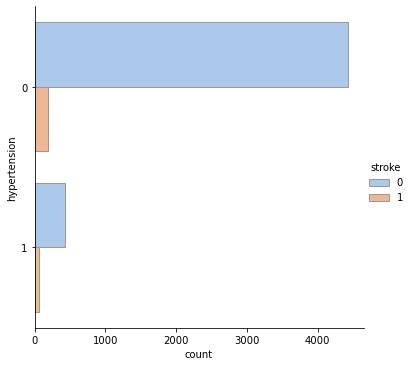

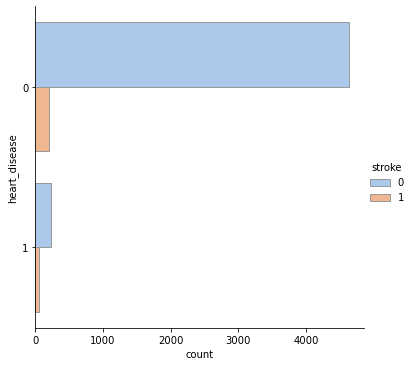

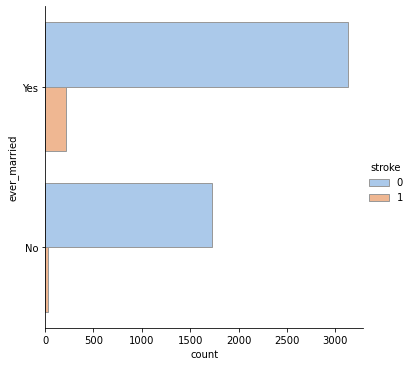

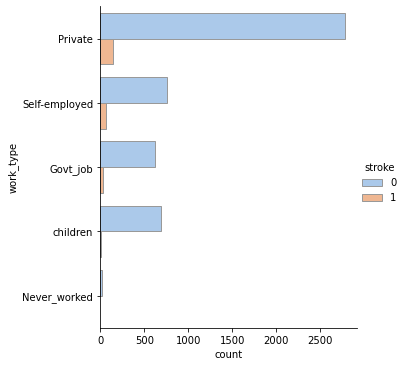

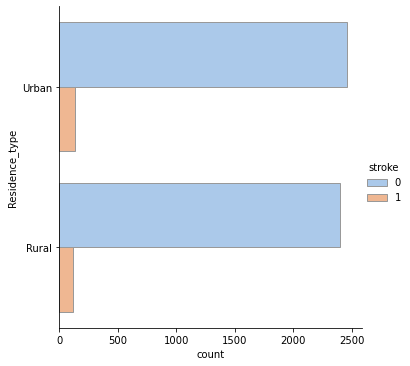

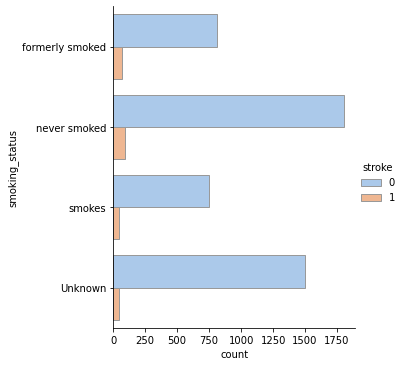

In [12]:
for i in classification_feature:
    sns.catplot(y=i, hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [13]:
data['age']=data['age'].astype("int")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

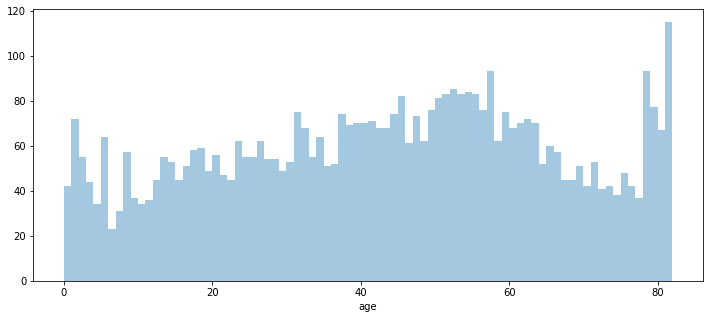

In [14]:
# Visualize age distribution
plt.figure(figsize=(12,5))
sns.distplot(data['age'], bins=max(data['age']), kde=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


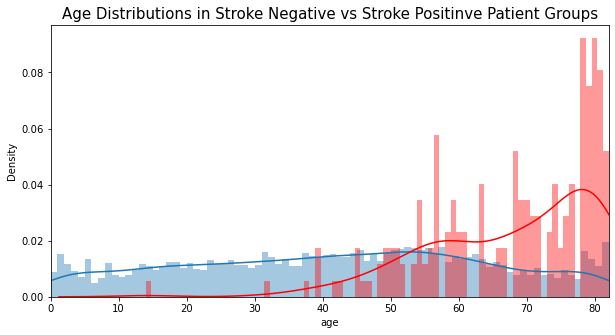

In [15]:
# Visualize age and stroke correlation
plt.figure(figsize=(10, 5))

sns.distplot(data[data['stroke'] == 0]["age"], bins=max(data['age']), kde=True)
sns.distplot(data[data['stroke'] == 1]["age"], bins=max(data['age']), color='red', kde=True)

plt.title('Age Distributions in Stroke Negative vs Stroke Positinve Patient Groups', fontsize=15)
plt.xlim([min(data['age']),max(data['age'])])
plt.show()